<h2>Importation des bibliothèques</h2>

In [473]:
import pandas as pd #pour manipuler les données tabulaires
from sklearn.model_selection import train_test_split #pour séparer les données en un jeu d’entraînement et un jeu de test
from sklearn.linear_model import LogisticRegression #l’algorithme de régression logistique pour faire la prédiction.
from sklearn.preprocessing import StandardScaler #pour normaliser/standardiser les variables (les rendre comparables)
from sklearn.impute import SimpleImputer #pour gérer les valeurs manquantes dans les données
from sklearn.metrics import confusion_matrix, classification_report #pour évaluer la qualité de la prédiction
import seaborn as sns #pour faire des graphiques
import matplotlib.pyplot as plt # pour faire des graphiques
import numpy as np

<h2>Lecture du fichier csv</h2>

In [474]:
train = pd.read_csv('train_copie.csv')

<h2>Création d'une copie du fichier csv</h2>

In [475]:
train_copie = train.copy()

<i style="color:#90ADC6">-> je crée des copy des fichiers csv originaux car je ne veux pas écraser l'original.</p>

<h2>Affichage des données</h2>

In [ ]:
train_copie.head()

In [ ]:
train_copie.dtypes

<h2>Sélection des colonnes pertinentes</h2>

In [476]:
colonnes_pertinents = ['Value','Amount', 'TransactionStatus','AmountLoan','IsFinalPayBack', 'IsThirdPartyConfirmed', 'DaysLate', 'NumberTransaction', 'NumberLoan']

X = train_copie[colonnes_pertinents] #les variables explicatives
y = train_copie['IsDefaulted'] # y = la variable cible à prédire

<i style="color:#90ADC6">-> Je sépare les données en 2 groupes</i>
- les features (X) -> ces variables expliquent ou influencent le résultat (défaut ou non)
- la variable cible (y) -> je récupères la variable que je veux que mon modèle apprenne à prédir

En conclusion je sépare ce que je connais (x), et ce que je veux prédire (y)

<h2>Séparation en jeu d’entraînement et de test</h2>

In [477]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=16
)

<i style="color:#90ADC6">-> Je sépare en données d'entraînement et de test en 2 parties.</i>

- X_train, y_train -> pour entraîner le modèle.
- X_test, y_test -> pour tester la qualité des prédictions

Donc je fais ça pour évaluer le modèle sur des données qu'il n'a jamais vues.

<h2>Imputation (remplacement des valeurs manquantes)</h2>

In [478]:
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

<h2>Standardisation</h2>

In [479]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<i style="color:#90ADC6">-> La standarisation permet de mettre toutes les variables explicatives (features) sur une même échelle.</i>

<h2>Création et entraînement du modèle de régression logistique</h2>

In [480]:
logreg = LogisticRegression(random_state=16)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=16)

<h2>Prédiction sur les données de test</h2>

In [481]:
y_pred = logreg.predict(X_test)

<h2>Évaluation du modèle — matrice de confusion</h2>

In [485]:
cnf_matrix = confusion_matrix(y_test, y_pred)
print("Matrice de confusion :\n", cnf_matrix)
print(classification_report(y_test, y_pred, target_names=['Pas en défaut', 'En défaut']))

Matrice de confusion :
 [[371  12]
 [ 10  27]]
               precision    recall  f1-score   support

Pas en défaut       0.97      0.97      0.97       383
    En défaut       0.69      0.73      0.71        37

     accuracy                           0.95       420
    macro avg       0.83      0.85      0.84       420
 weighted avg       0.95      0.95      0.95       420



<h2>Affichage matrice de confusion</h2>

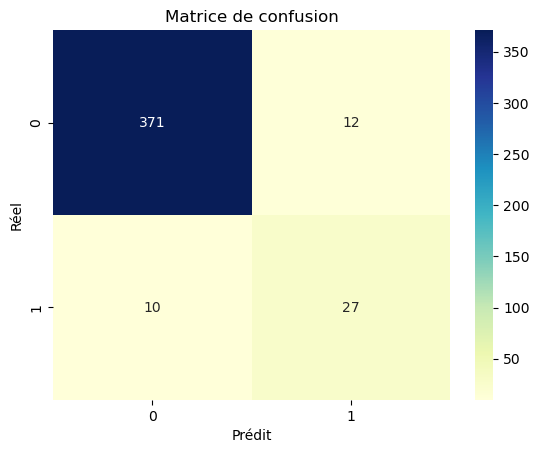

In [483]:
sns.heatmap(cnf_matrix, annot=True, fmt='g', cmap='YlGnBu')
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de confusion')
plt.show()


<h2>Calcul du pourcentage de bonnes prédictions</h2>

In [484]:
n_correct = (y_test == y_pred).sum()
n_total = len(y_test)
print(f"Pourcentage de bonnes prédictions : {n_correct / n_total:.2%}")

Pourcentage de bonnes prédictions : 94.76%
